<a href="https://colab.research.google.com/github/David-gutierrez-rodriguez/Simulacion-I/blob/main/Aceptaci%C3%B3n_y_rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variables aleatorias no uniformes
## Método de aceptación y rechazo
### Pasos:


1.   Generar 2 números aleatorios $R_1, R_2 \sim (0, 1)$
2.   Determinar $x = a + (b - a)R_1$
3.   Calcular $f(x)$ con el valor de $x$ del paso anterior
4.   Si $R_2 \le \frac{f(x)}{M}$, aceptamos $x$, en otro caso, se rechaza $x$

Ejempo con distribución triangular con parámetros: $$a = 1, b = 3, c = 5$$

Función de distribución
$$f(x) = \left\{\begin{matrix}
\frac{2(x - a)}{(c - a)(b - a)} & \text{si} & a \le x \le b\\
\frac{2(x - c)}{(c - a)(b - c)} & \text{si} & b < x \le c
\end{matrix}\right.$$
Media y varianza teóricas:
$$\mu = \frac{a + b + c}{3}$$\
$$\sigma^2 = \frac{a^2 + b^2 + c^2 - ab - ac - bc}{18}$$



In [2]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

Función de distribución triangular

In [3]:
def f(a, b, c, x):
  if x >= a and x <= b:
    return 2*(x - a)/((b - a)*(c - a))
  elif x > b and x <= c:
    return 2*(x - c)/((b - c)*(c - a))
  else:
    return 0

Gráfica de la distribución triangular

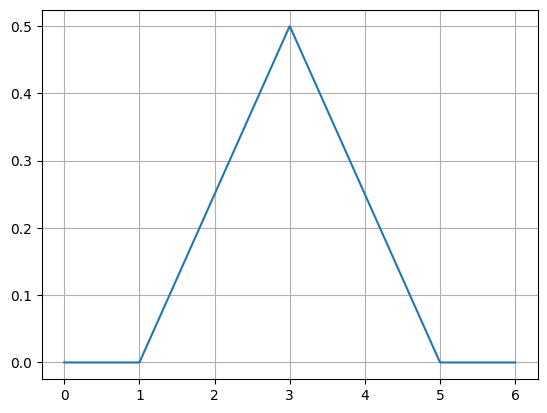

In [4]:
x = np.linspace(0, 6, 1000)
y = [f(1, 3, 5, x) for x in x]
plt.plot(x, y)
plt.grid(True)
plt.show()

Función que decide que números $x$ serán parte de la distribución triangular, con un máximo $M = 0.5$

In [7]:
def decision(a, b, M, n):
  nums, c = [], 0
  for i in range(n):
    R1 = random()
    R2 = random()
    x = a + (b - a)*R1
    if R2 <= f(1, 3, 5, x)/M:
      nums.append(R1)
      c += 1
  return nums, c

Histograma de 100,000 números generados

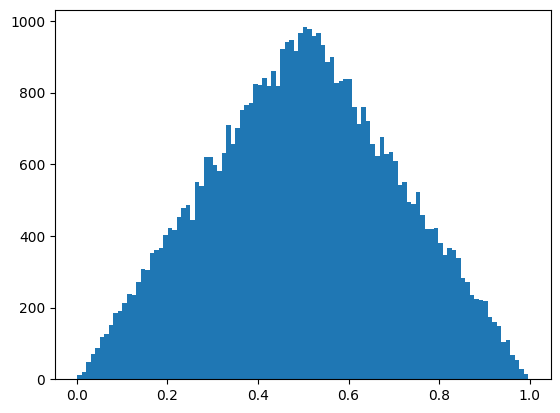

In [8]:
x = decision(1, 5, 0.5, 100000)
plt.hist(x[0], bins = 100)
plt.show()

Comparación entre media y varianzas simuladas y teóricas

In [9]:
mu_sim = np.mean(x[0])
s_sim = np.var(x[0])

a, b, c = 1, 3, 5
mu_teo = (a + b + c)/3
s_teo = (a**2 + b**2 + c**2 - a*b - a*c - b*c)/18

print("Media teórica:", mu_teo)
print("Media simulada:", mu_sim)

print("\nVarianza teórica:", s_teo)
print("Varianza simulada:", s_sim)

print("\nLa función aceptó", x[1], "valores")

Media teórica: 3.0
Media simulada: 0.49950724515608597

Varianza teórica: 0.6666666666666666
Varianza simulada: 0.04164224343015459

La función aceptó 50050 valores
